## Let's perform PCA on our data to explore how the different features are loaded to principle components, helping us see similar variance capture among our features

Note that some code is inspired by ChatGPT

In [ ]:
# Connect to google drive data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
main_path = '/content/drive/MyDrive/MLGeo23_Landslide_FinalProject/data'

# Load the CSV file into a DataFrame
file_path = main_path + '/data_complete_final.csv'
df = pd.read_csv(file_path)
PCA_df = df
# drop useuless columns
#df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'OBJECTID', 'landslide_ID','CONFIDENCE','MATERIAL','geometry','std_elev','min_rough','max_rough','min_elev','max_elev','std_rough','min_slope','max_slope','std_slope','min_asp','max_asp','std_asp'], axis=1, inplace=True)
PCA_df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'OBJECTID', 'landslide_ID','CONFIDENCE','MATERIAL','geometry','centroid','soruce_length','source_area','deposit_area'], axis=1, inplace=True)
PCA_df.columns

Index(['SLOPE_DEG', 'HS_HEIGHT', 'FAIL_DEPTH', 'VOLUME_FT3', 'min_elev',
       'max_elev', 'mean_elev', 'std_elev', 'min_rough', 'max_rough',
       'mean_rough', 'std_rough', 'min_slope', 'max_slope', 'mean_slope',
       'std_slope', 'min_asp', 'max_asp', 'mean_asp', 'std_asp'],
      dtype='object')

In [ ]:
save_path = '/content/drive/MyDrive/MLGeo23_Landslide_FinalProject/deliverables/'

In [ ]:
features = [
    'SLOPE_DEG', 'HS_HEIGHT', 'FAIL_DEPTH',
    'VOLUME_FT3','mean_elev','mean_rough','mean_slope','mean_asp'
]

X = PCA_df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)  # You can choose the number of principal components
principalComponents = pca.fit_transform(X_scaled)

# Creating a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]
principalDf = pd.DataFrame(data=principalComponents, columns=columns)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Sum of explained variance ratios:", np.sum(explained_variance))

Explained variance ratio: [0.41243313 0.18092659 0.13706318 0.1146277  0.08622644]
Sum of explained variance ratios: 0.9312770502746056


It seems as though 8 principal components explain greater than 95% of the variance.

In [ ]:
import seaborn as sns

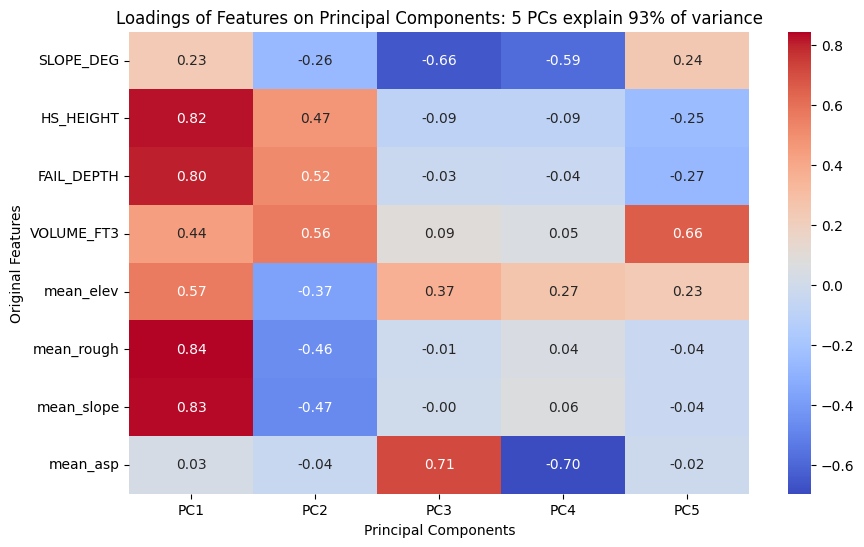

In [ ]:
# Calculating loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creating a DataFrame with loadings
loadings_df = pd.DataFrame(loadings, columns=columns, index=features)

# Create a heatmap for the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Loadings of Features on Principal Components: 5 PCs explain 93% of variance')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()